[0.         0.         0.         0.         0.5        0.83333333
 1.         1.         1.         1.         1.         1.
 1.        ]
6


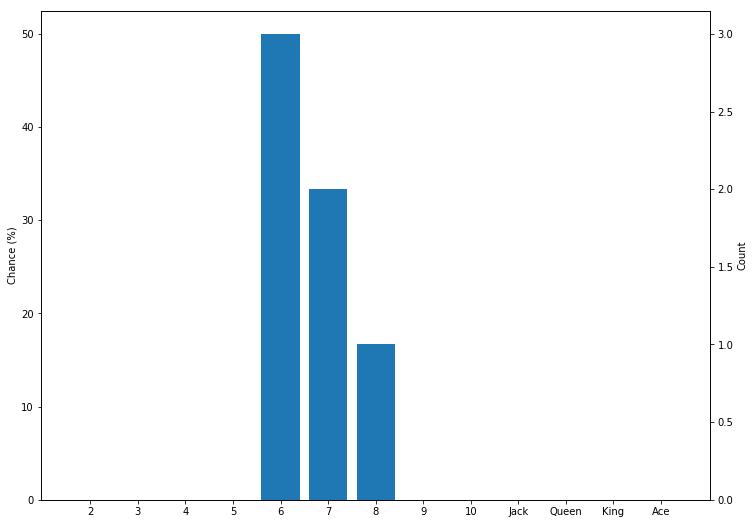

In [274]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import show

card = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']

def best1st(chance):
    centre = np.cumsum(chance)              # Making a cumulative list of the chances
    print(centre)
    best = (abs(centre - .5)).argmin()      # Finding the nearest value to 50%
    return card[best]

def best2nd(chance):
    higher

# A function that takes a count array, draws a (random) card and then 
# calculates the new chance for each card to be drawn.
def newchance(count):
    cards = np.sum(count)
    while True:
        picked = np.random.randint(0, len(count))
        if count[picked] == 0:
            continue
        else:
            count[picked] -= 1
            if np.sum(count) != 0:
                chance = count/np.sum(count)
                return chance, count
            else:
                chance = np.zeros(len(count))
                return chance, count
            
# A function that simulates a game. Plug in a starting list for the counts 
# of each card and then choose the number of iterations (card draws). The 
# result is the new chance after n number of card draws.
def simulation(count, iterations):
    cards = np.sum(count)
    if iterations == 0:
        return count/cards, count, cards
    else:
        while iterations > 0:
            if np.sum(count) != 0:
                chance, count = newchance(count)
                iterations -= 1
                continue
        return chance, count

    
    
count = np.array([4 for _ in range(13)])
nchance, ncount = simulation(count, 46)
print(best1st(nchance))


#print(newchance(count, cards))

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
ax.bar(range(13), nchance*100)
ax.set_ylabel('Chance (%)')
ax2 = ax.twinx()
ax2.bar(range(13), ncount)
ax2.set_ylabel('Count')
plt.xticks(range(13), card, rotation=30)
show()